In [17]:
# Import libraries
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

#modelling
# import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [18]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
X = df.drop('math score', axis=1)
# y = df.loc[:,'math score']
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [23]:
#create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer      = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScalar", numeric_transformer, num_features),
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [26]:
X.shape

(1000, 19)

In [28]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [30]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [31]:
#create an evaluate function
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square =r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso"             : Lasso(),
    "Ridge"             : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Random Forest Regressor"     : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()

}

model_list=[]
r2_list = []

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model_performance for Training set')

    print('Root Mean Squared Error: {}'.format(model_train_rmse))
    print('Mean Absolute Error: {}'.format(model_train_mae))
    print('- R2 square: {}'.format(model_train_r2))


    print('-------------------------------')


    print('Model performance for test set')

    print('model_performance for Test set')
    print('Root Mean Squared Error: {}'.format(model_test_rmse))
    print('Mean Absolute Error: {}'.format(model_test_mae))
    print('- R2 square: {}'.format(model_test_r2))

    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
model_performance for Training set
Root Mean Squared Error: 5.340183842955456
Mean Absolute Error: 4.272265625
- R2 square: 0.8735068463594741
-------------------------------
Model performance for test set
model_performance for Test set
Root Mean Squared Error: 5.421371554436202
Mean Absolute Error: 4.2253125
- R2 square: 0.8792164757750934


Lasso
model_performance for Training set
Root Mean Squared Error: 6.593815587795566
Mean Absolute Error: 5.206302661246526
- R2 square: 0.8071462015863456
-------------------------------
Model performance for test set
model_performance for Test set
Root Mean Squared Error: 6.519694535667419
Mean Absolute Error: 5.157881810347763
- R2 square: 0.8253197323627853


Ridge
model_performance for Training set
Root Mean Squared Error: 5.323324922741654
Mean Absolute Error: 4.26498782372598
- R2 square: 0.8743042615212909
-------------------------------
Model performance for test set
model_performance for Test set
Root Mean Squared Error:

#### Reslts

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879216
4,Random Forest Regressor,0.852135
6,AdaBoost Regressor,0.851687
5,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497


In [37]:
# final Model - Linear Regression
lin_model =LinearRegression(fit_intercept=True)
lin_model =lin_model.fit(X_train, y_train)
y_pred =lin_model.predict(X_test)
score =r2_score(y_test, y_pred)*100
print("Accuracy of the  model is %.2f" %score)

Accuracy of the  model is 87.92


### plot y_pred and y_test

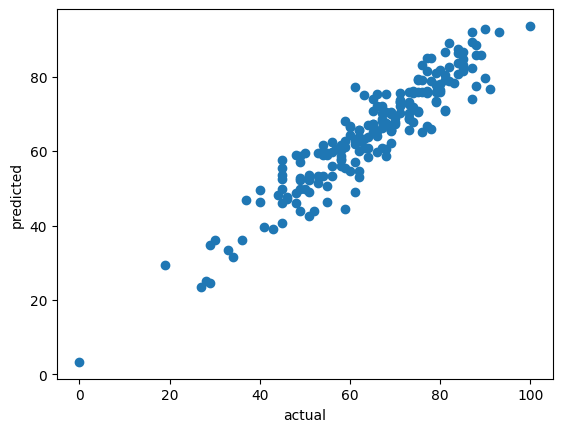

In [38]:
plt.scatter(y_test, y_pred);
plt.xlabel('actual');
plt.ylabel('predicted');

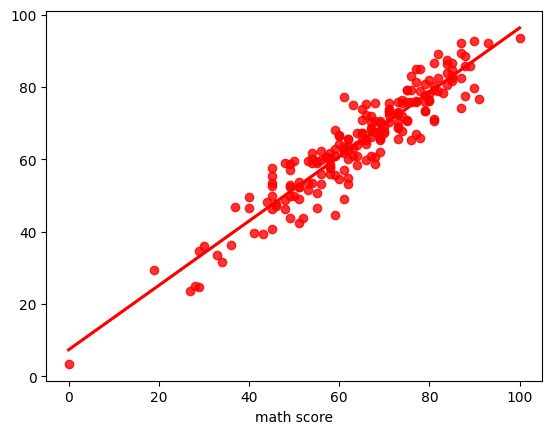

In [39]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');

#### Differenc ebetween Actual and predicted

In [40]:
pred_df = pd.DataFrame({'Actual_value' : y_test, 'Predicted_value' : y_pred, 'Difference' : y_test -y_pred})
pred_df

,Actual_value,Predicted_value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
